In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="bzkcK5It5sCeCviXjqrY")
project = rf.workspace("maria-4iqc2").project("object-detection-bus-dataset")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to object-detection-bus-dataset-2 in yolov8:: 100%|██████████| 684/684 [00:00<00:00, 4865.72it/s]


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=35 imgsz=294 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/object-detection-bus-dataset-2/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=294, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

/content


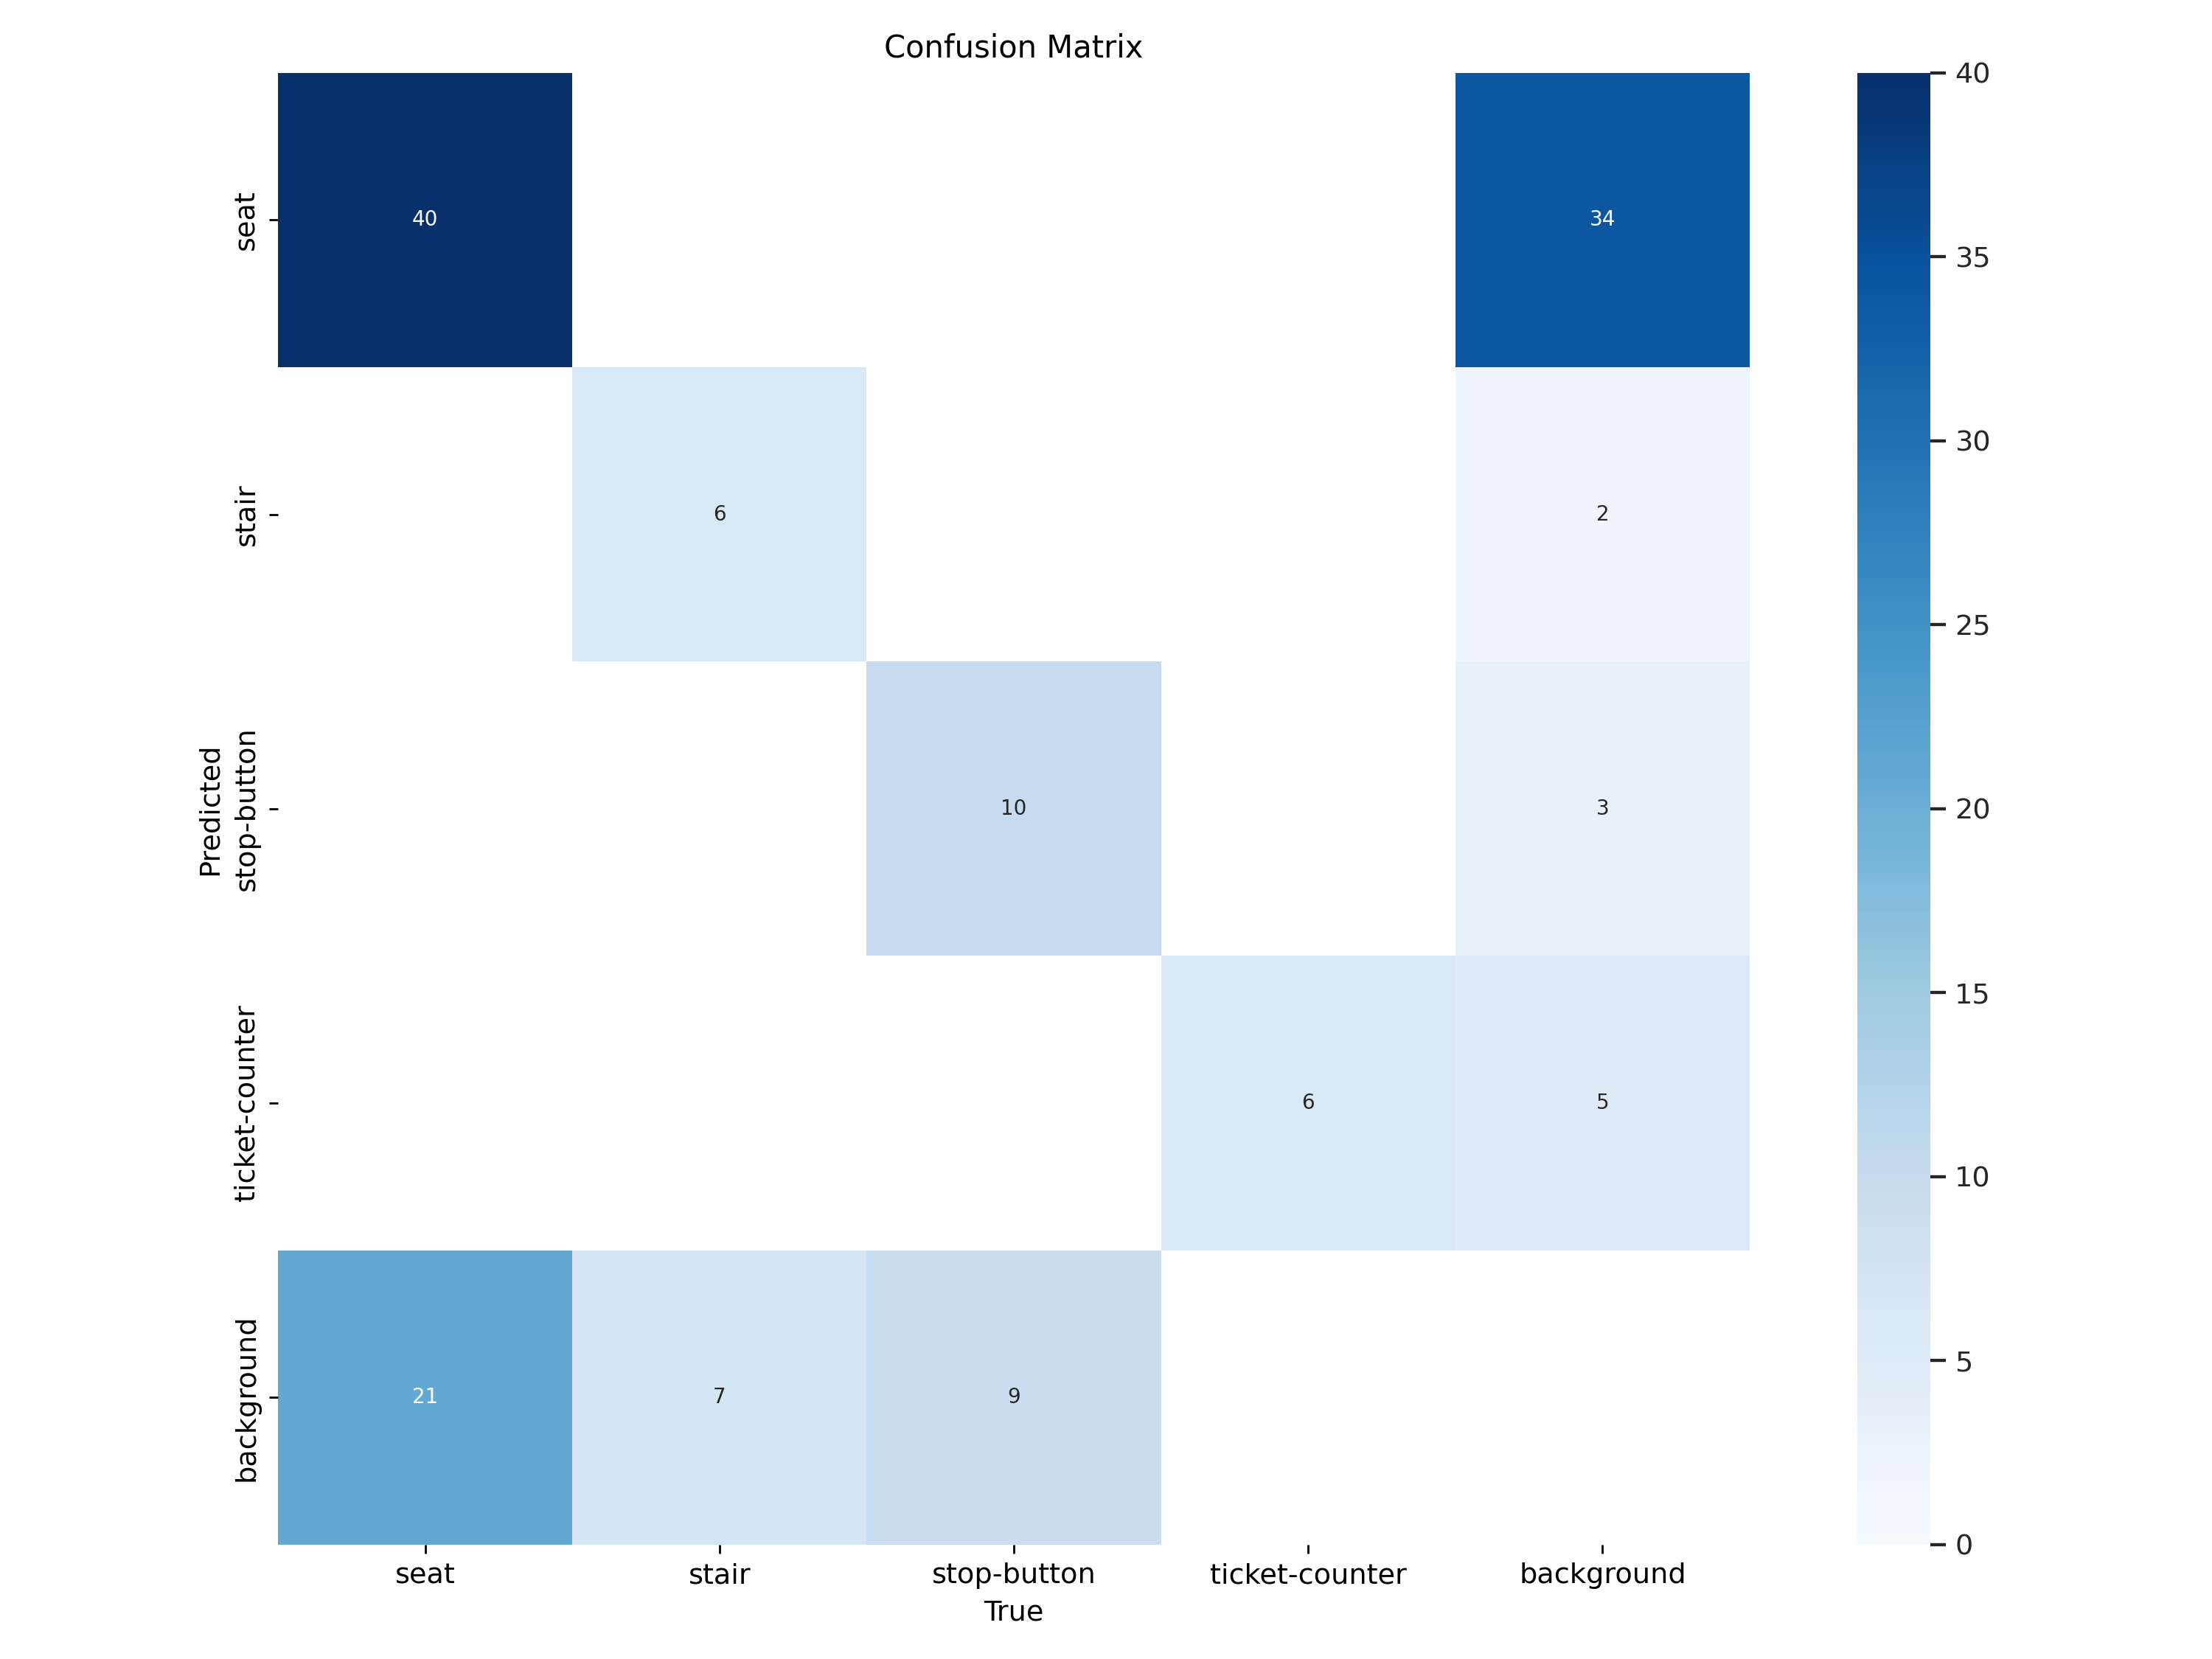

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


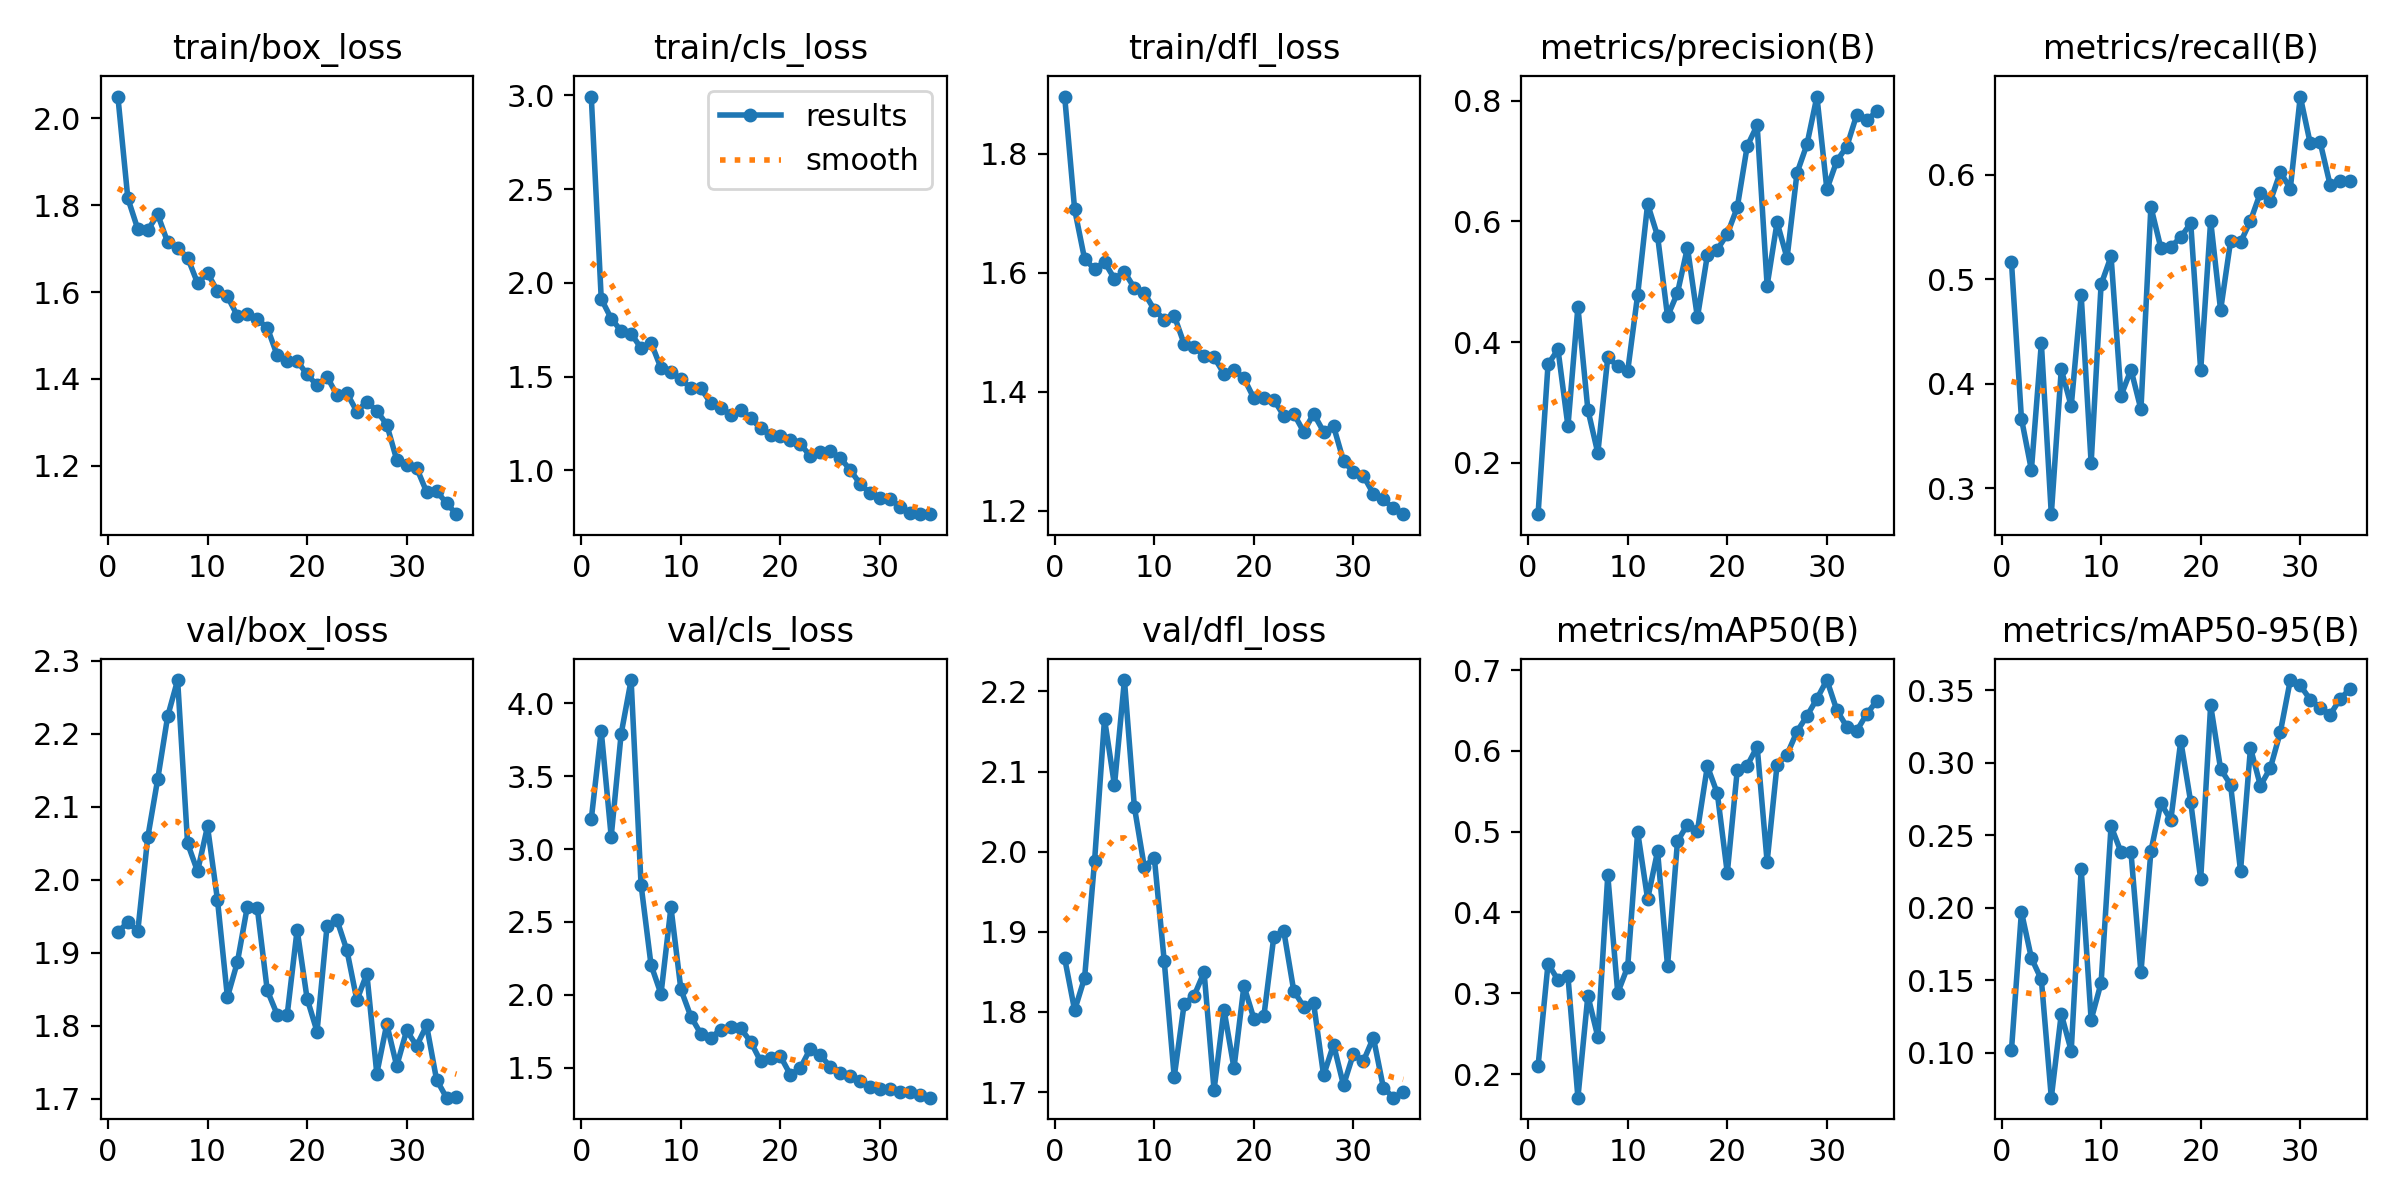

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


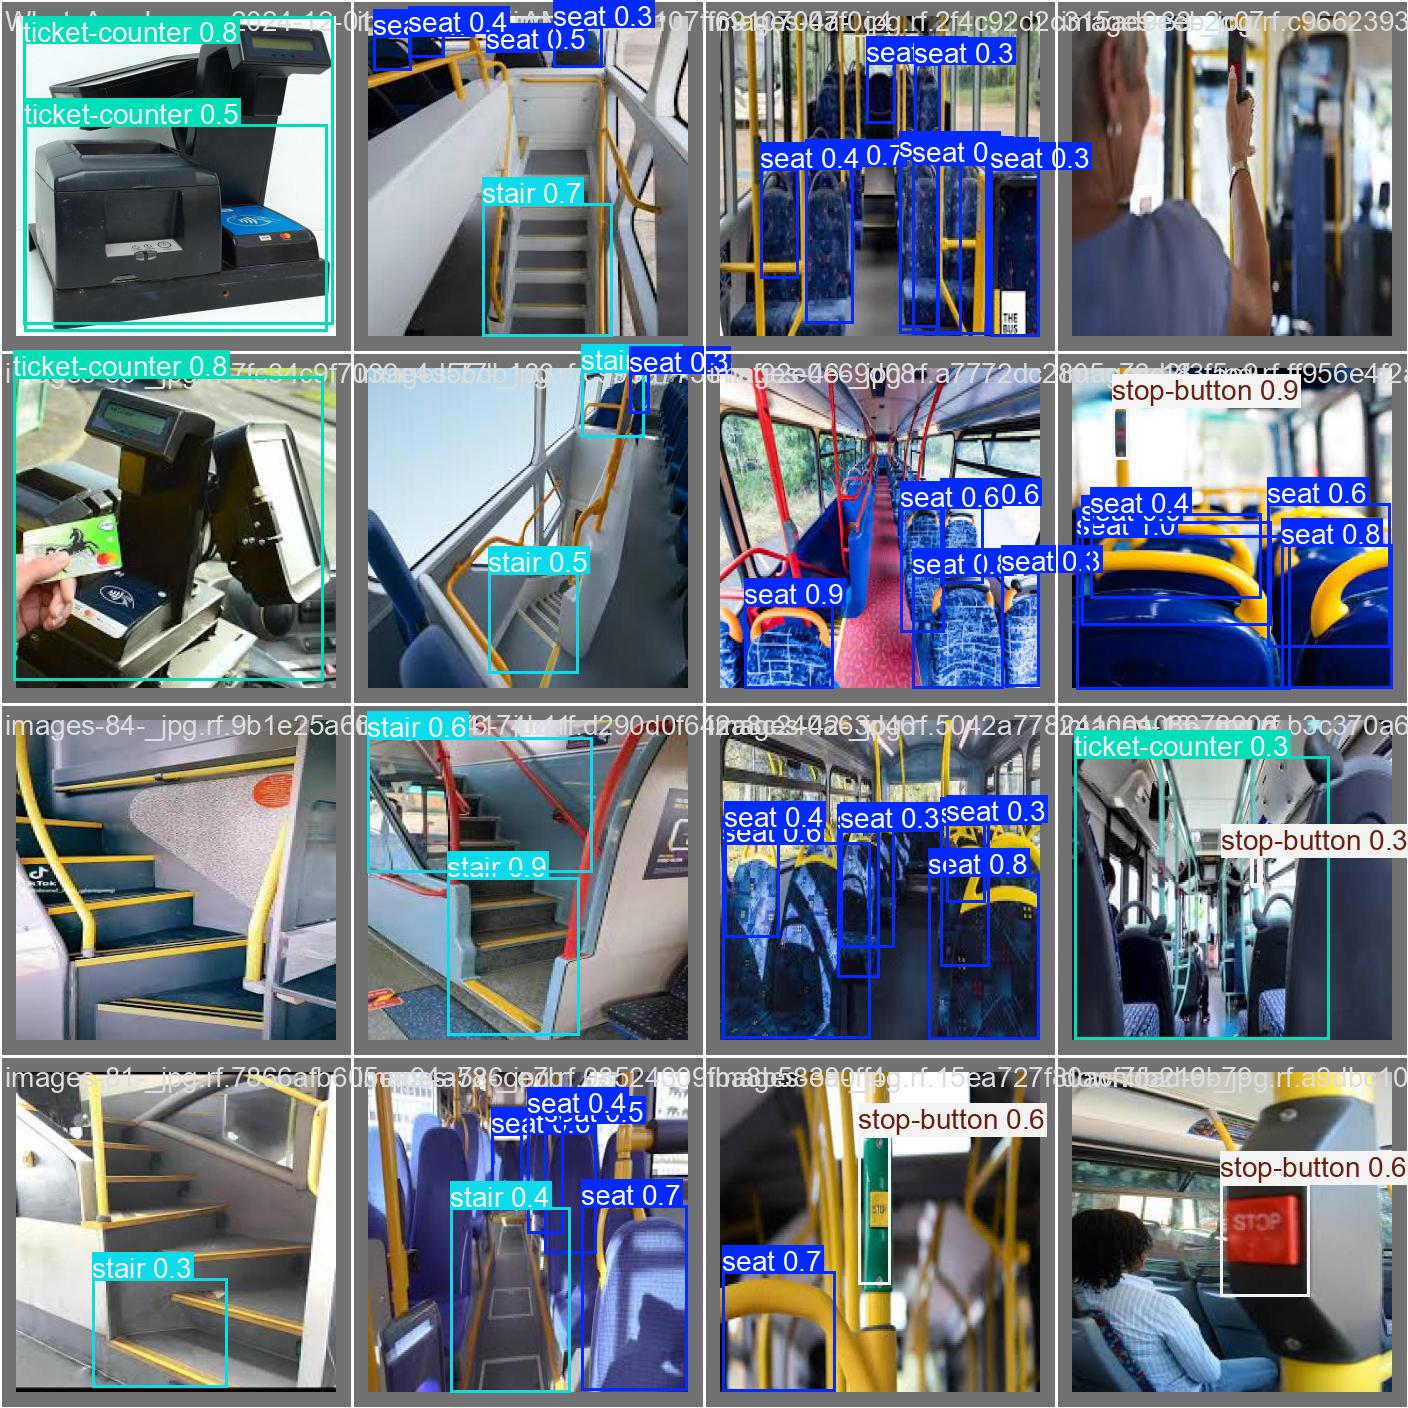

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=900)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/object-detection-bus-dataset-2/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100% 28/28 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:06<00:00,  3.36s/it]
                   all         28         99      0.808      0.587      0.665      0.357
                  seat         13         61      0.769      0.508      0.615      0.318
                 stair          9         13          1      0.452      0.599      0.211
           stop-button         14         19       0.71      0.388      0.497      0.208
        ticket-counter          6          6      0.751          1      0.948      0.691
Speed: 3.2ms preprocess, 220.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to run

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/14 /content/datasets/object-detection-bus-dataset-2/test/images/WhatsApp-Image-2024-12-01-at-2-21-45-AM-17-_jpeg.rf.85fe1828c9f603024939c7bc01e5b09f.jpg: 320x320 7 seats, 1 stop-button, 294.7ms
image 2/14 /content/datasets/object-detection-bus-dataset-2/test/images/WhatsApp-Image-2024-12-01-at-2-21-45-AM-7-_jpeg.rf.0ef372a288c30a16ed0618c10bb3d569.jpg: 320x320 7 seats, 1 stair, 259.2ms
image 3/14 /content/datasets/object-detection-bus-dataset-2/test/images/WhatsApp-Image-2024-12-01-at-2-21-46-AM-6-_jpeg.rf.ea052a64512d925f27ceebdd80aa3b68.jpg: 320x320 8 seats, 302.2ms
image 4/14 /content/datasets/object-detection-bus-dataset-2/test/images/download-12-_jpg.rf.0ef255b1906c4bc85ff97d2b1af42c5d.jpg: 320x320 5 seats, 290.9ms
image 5/14 /content/datasets/object-detection-bus-dataset-2/test/images/download-16-

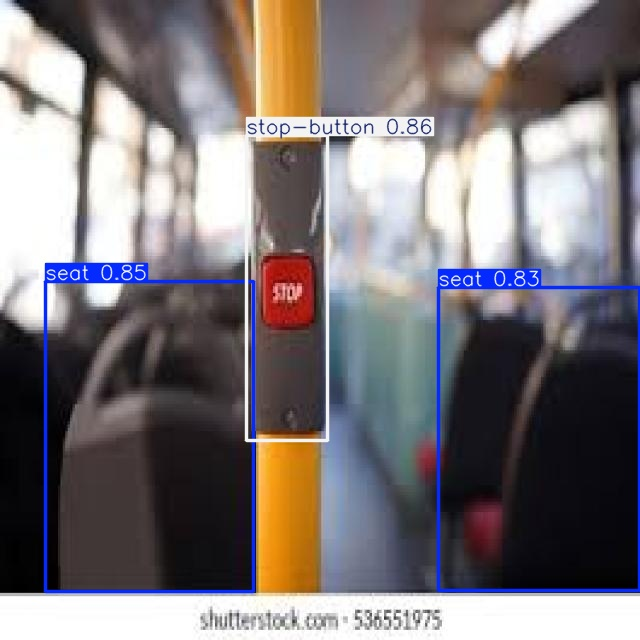

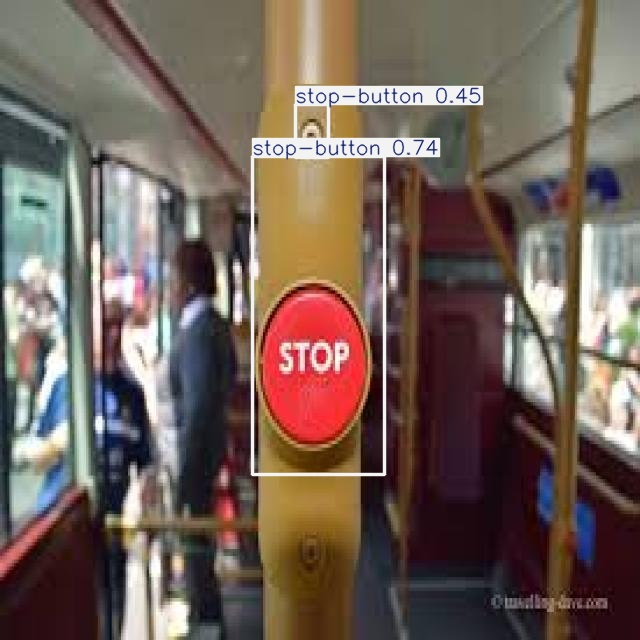

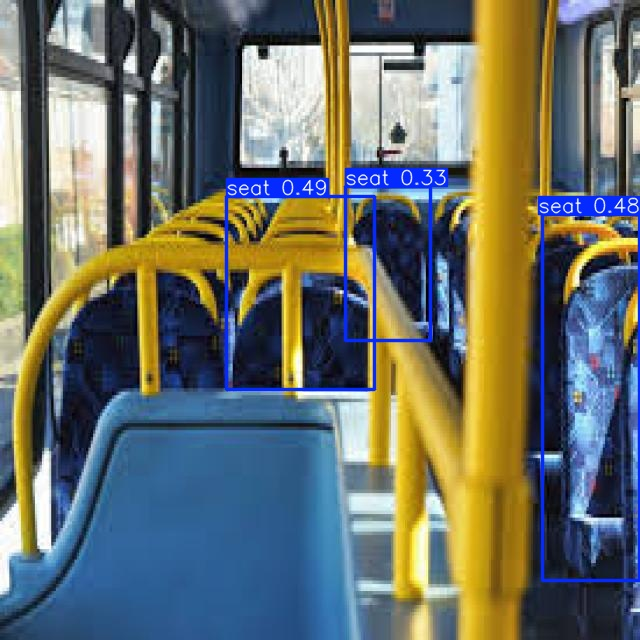

In [13]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")